Financial Risk Analysis - Evaluation Investment Portfolios

#Objective:
This report involves evaluating the risk and performance of different investment portfolios using historical financial data. The data would be statistically analysed so that it would help in making informed investment decisions.

In [2]:
%pip install pandas numpy seaborn matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.5-cp312-cp312-win_amd64.whl.metadata (169 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached numpy-2.2.2-cp312-cp312-win_amd64.whl (12.6 MB)
Using cached seaborn-0.13.2-py3-

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [6]:
data = pd.read_csv(r'E:\Python finance projects\Projects for Github\financial_portfolio_data.csv')
data.head(10)

,Date,Asset,Price
0,2023-07-10,Bond B,385.64
1,2023-03-03,Stock B,297.20
2,2023-09-13,Bond B,75.98
3,2023-01-07,Bond B,356.34
4,2023-06-04,Stock A,260.05
5,2023-04-02,Bond B,65.51
6,2023-01-14,Commodity A,486.32
7,2023-08-17,Commodity A,477.10
8,2023-03-27,Stock A,280.81
9,2023-05-13,Stock B,92.15


In [8]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    500 non-null    object 
 1   Asset   500 non-null    object 
 2   Price   500 non-null    float64
dtypes: float64(1), object(2)
memory usage: 11.8+ KB


In [9]:
data["Date"] = pd.to_datetime(data["Date"], format = '%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    500 non-null    datetime64[ns]
 1   Asset   500 non-null    object        
 2   Price   500 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 11.8+ KB


In [10]:
data.describe()

,Date,Price
count,500,500.000000
mean,2023-06-23 09:36:00,281.357720
min,2023-01-02 00:00:00,50.200000
25%,2023-03-28 00:00:00,169.945000
50%,2023-06-21 12:00:00,289.120000
75%,2023-09-13 00:00:00,393.132500
max,2023-12-31 00:00:00,499.790000
std,NaN,130.978208


In [11]:
pd.DataFrame(data["Asset"].value_counts())

,count
Asset,
Bond B,110
Bond A,109
Commodity A,106
Stock A,101
Stock B,74


In [13]:
duplicates = data[data.duplicated(subset=['Date', 'Asset'], keep=False)]
duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 8 to 491
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    139 non-null    datetime64[ns]
 1   Asset   139 non-null    object        
 2   Price   139 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.3+ KB


In [14]:
aggregated_data = data.groupby(['Date', 'Asset']).agg({'Price': 'last'}).reset_index()
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    425 non-null    datetime64[ns]
 1   Asset   425 non-null    object        
 2   Price   425 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 10.1+ KB


In [15]:
data = aggregated_data

In [16]:
data.set_index("Date", inplace=True)
data.head()

,Asset,Price
Date,,
2023-01-02,Stock A,172.15
2023-01-03,Bond A,198.61
2023-01-03,Commodity A,453.23
2023-01-03,Stock A,488.57
2023-01-04,Bond A,142.24


In [17]:
data.sort_values(by=["Asset", "Date"], inplace=True)
data.head()

,Asset,Price
Date,,
2023-01-03,Bond A,198.61
2023-01-04,Bond A,142.24
2023-01-08,Bond A,146.58
2023-01-11,Bond A,473.20
2023-01-13,Bond A,376.57


In [18]:
return_series = (data["Price"] - data["Price"].shift(1)) / data["Price"].shift(1)
return_series.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 425 entries, 2023-01-03 to 2023-12-22
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
424 non-null    float64
dtypes: float64(1)
memory usage: 6.6 KB


In [19]:
data["return"] = data.groupby("Asset")["Price"].pct_change()
data.head()

,Asset,Price,return
Date,,,
2023-01-03,Bond A,198.61,NaN
2023-01-04,Bond A,142.24,-0.283823
2023-01-08,Bond A,146.58,0.030512
2023-01-11,Bond A,473.20,2.228271
2023-01-13,Bond A,376.57,-0.204205


In [20]:
data["return"].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 425 entries, 2023-01-03 to 2023-12-22
Series name: return
Non-Null Count  Dtype  
--------------  -----  
420 non-null    float64
dtypes: float64(1)
memory usage: 6.6 KB


In [21]:
analyzed_return = data.groupby("Asset").agg({"return": ["mean", "std"]}).rename(columns = {"mean": "Average Return", "std": "risk"})
analyzed_return["Sharpe Ratio"] = analyzed_return["return"]["Average Return"] / analyzed_return["return"]["risk"]
analyzed_return

return           Sharpe Ratio
            Average Return      risk             
Asset                                            
Bond A            0.392623  1.333953     0.294331
Bond B            0.383650  1.222397     0.313851
Commodity A       0.445066  1.360368     0.327166
Stock A           0.367105  1.267488     0.289632
Stock B           0.609861  1.706511     0.357373

In [22]:
best_asset = analyzed_return["Sharpe Ratio"].idxmax()
worst_asset = analyzed_return["Sharpe Ratio"].idxmin()

In [24]:
print(f"The asset with the highest Sharpe Ratio is: {best_asset} with a Sharpe Ratio of {analyzed_return['Sharpe Ratio'].max()}")
print(f"The asset with the lowest Sharpe Ratio is: {worst_asset} with a Sharpe Ratio of {analyzed_return['Sharpe Ratio'].min()}")

The asset with the highest Sharpe Ratio is: Stock B with a Sharpe Ratio of 0.3573727581271892
The asset with the lowest Sharpe Ratio is: Stock A with a Sharpe Ratio of 0.2896318507065823


In [25]:
pivot_data = data.reset_index().pivot(index="Date", columns="Asset", values="return")
pivot_data.head()

Asset,Bond A,Bond B,Commodity A,Stock A,Stock B
Date,,,,,
2023-01-02,NaN,NaN,NaN,NaN,NaN
2023-01-03,NaN,NaN,NaN,1.838048,NaN
2023-01-04,-0.283823,NaN,NaN,NaN,NaN
2023-01-05,NaN,NaN,-0.638660,NaN,NaN
2023-01-07,NaN,NaN,1.567137,NaN,NaN


In [26]:
correlation_matrix = pivot_data.corr()
correlation_matrix

Asset,Bond A,Bond B,Commodity A,Stock A,Stock B
Asset,,,,,
Bond A,1.000000,-0.043729,-0.115973,-0.234267,-0.198601
Bond B,-0.043729,1.000000,-0.349057,0.180479,0.202751
Commodity A,-0.115973,-0.349057,1.000000,0.461493,0.210269
Stock A,-0.234267,0.180479,0.461493,1.000000,0.340772
Stock B,-0.198601,0.202751,0.210269,0.340772,1.000000


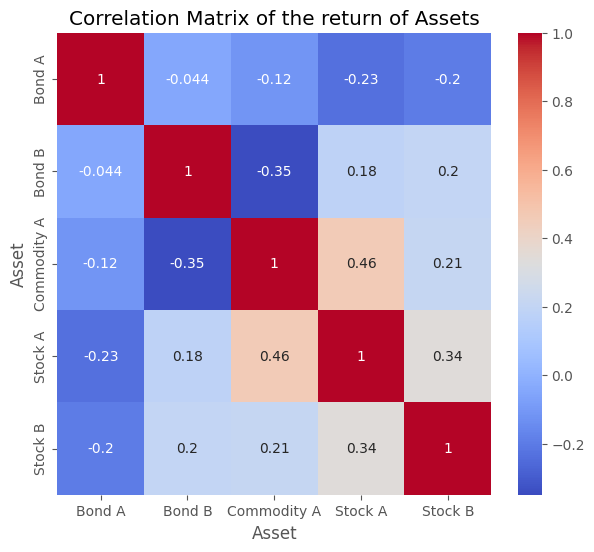

In [27]:
plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of the return of Assets")
plt.show()

INFERENCE:
1. There is no huge correlation between the returns pf the assets.
2. The correlation between the returns of Commodity A and Stock A is 0.46. This means that there is moderate degree correlation between these assets
3. The correlation between the returns of Stock A and Stock B is 0.34. This means that there is weak moderate degree correlation between these assets
4. There are no other notable positive correlations in the dataset.
5. The highest negative correlation is between the returns of Commodity A and Bond B which is -0.35. This means that there is weak moderate degree correlation between these assets
6. The correlation between the returns of Stock A and Bond A is -0.23. This means that there is weak degree correlation between these assets
7. There are no other notable negative correlations in the dataset.

RECOMMENDATIONS BASED ON RETURNS:
1. It is better not to invest stocks with high negative correlation as they tend to move in opposite directions. Money gained from one asset is neutralized from the loss of another asset.
2. Therefore, do not invest in the following pairs together:
    a) Stock A and Bond A
    b) Bond B and Commodity A
3. Assets with high positive correlation is high risk high reward as they tend to move in the same direction. Collapse in one is accompanied by collapse in the other.
4. Investing in the following pair of assets together might give very high rewards but causes huge collapse when they collapse.
  1. Stock A and Commodity A
  2. Stock A and Stock B
5. The safest pair of assets with lesser high rewards are the ones with correlation less than equal to -2.0 – 2.0.
    a) Stock A and Bond B
    b) Bond A and Bond B
    c) Stock B and Bond B
    d) Stock B and Commodity A
    e) Stock A and Commodity A

POSSIBLE STRATEGY:
1) Since the best stock according to Sharpe Ratio is Bond B, it is best to invest in Bond B and then Stock A and Commodity A which have good positive correlation with Bond B. This strategy is the best when market is high but it turns out to be the worst when market is low.
2) Since the best stock according to Sharpe Ratio is Bond B, Money can be put in Bond A and Bond B which have negligible correlation together. This strategy is no risk little reward.